<a href="https://colab.research.google.com/github/disturbed-mystic1/ds_salary_proj/blob/main/MNIST_DATA_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [25]:
print("TensorFlow version:", tf.__version__)  

TensorFlow version: 2.8.0


In [27]:
(ds_train, ds_test), ds_info = tfds.load('mnist',
                                         split=['train', 'test'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

In [28]:
def normalize(image, label):
  return tf.cast(image, tf.float32) / 255., label

In [29]:
ds_train = ds_train.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache().shuffle(ds_info.splits['test'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [30]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

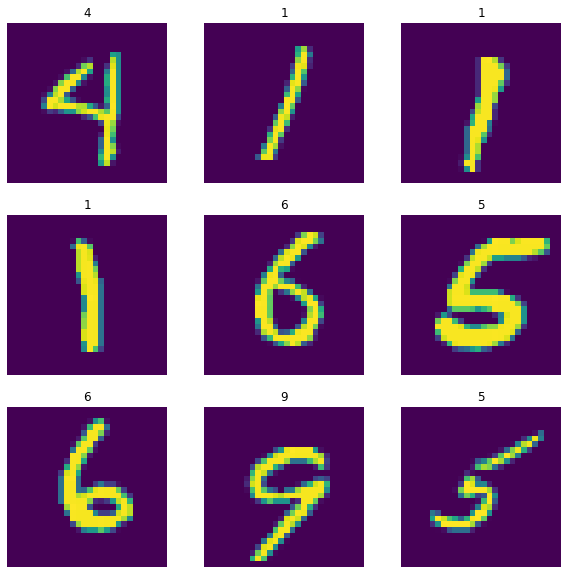

In [31]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    plt.title(classes[labels[i]])
    plt.axis('off')

In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


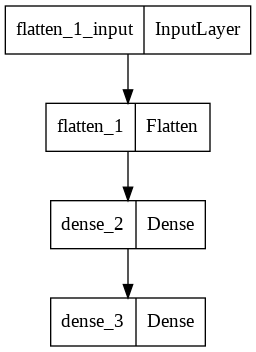

In [19]:
tf.keras.utils.plot_model(model)

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(
    ds_train,
    validation_data = ds_test,
    epochs=7
)

Epoch 1/7
469/469 [==============================] - 3s 5ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.1750 - val_accuracy: 0.9775
Epoch 2/7
469/469 [==============================] - 2s 5ms/step - loss: 5.7064e-04 - accuracy: 0.9998 - val_loss: 0.1770 - val_accuracy: 0.9764
Epoch 3/7
469/469 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.1926 - val_accuracy: 0.9771
Epoch 4/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.1694 - val_accuracy: 0.9794
Epoch 5/7
469/469 [==============================] - 2s 5ms/step - loss: 2.9823e-05 - accuracy: 1.0000 - val_loss: 0.1619 - val_accuracy: 0.9810
Epoch 6/7
469/469 [==============================] - 2s 4ms/step - loss: 9.1258e-06 - accuracy: 1.0000 - val_loss: 0.1616 - val_accuracy: 0.9809
Epoch 7/7
469/469 [==============================] - 2s 4ms/step - loss: 6.8117e-06 - accuracy: 1.0000 - val_loss: 0.1614 - val_accuracy: 0.98

In [41]:
for e in history.history:
  print(e)

loss
accuracy
val_loss
val_accuracy


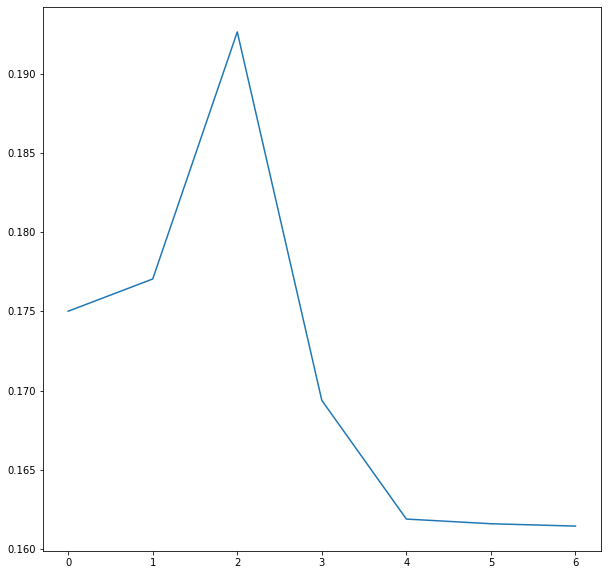

In [45]:
plt.figure(figsize=(10, 10))
plt.plot(range(7), history.history['val_loss'])

In [46]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9807


[0.16144829988479614, 0.9807000160217285]

In [47]:
pred = model.predict(ds_test)

pred = list(map(lambda x: np.argmax(x), pred))

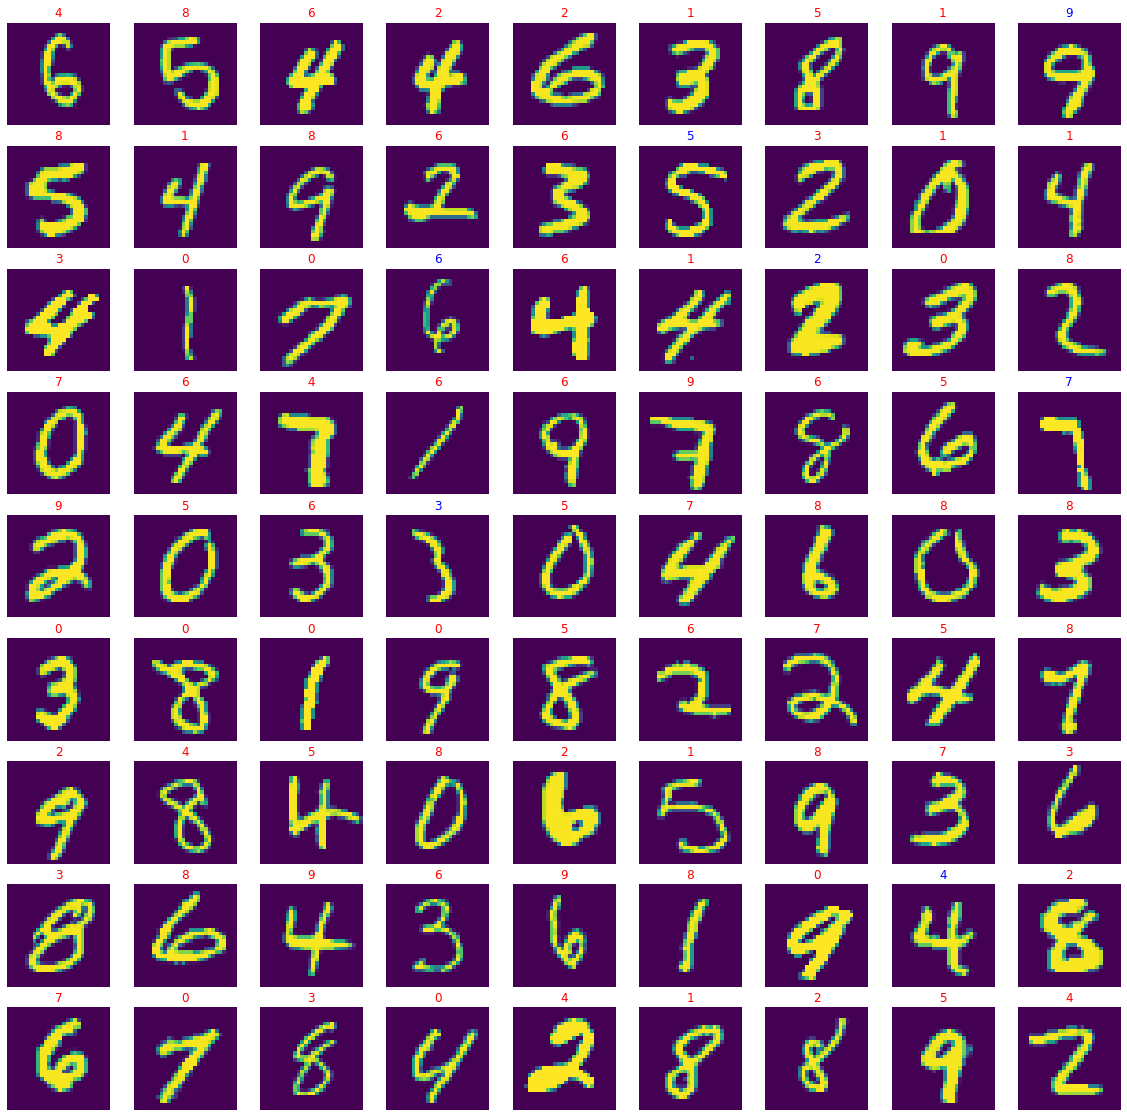

In [48]:
plt.figure(figsize=(20, 20))

for images, labels in ds_test.take(1):
  for i in range(81):
    ax = plt.subplot(9, 9, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    prediction = pred[i] == classes[labels[i]]
    plt.title(pred[i], color=('blue' if prediction else 'red'))
    plt.axis('off')